<a href="https://colab.research.google.com/github/ViniSpeck/DS/blob/main/DS_03_parcial_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas e dados do Airbnb referentes à região de Gante na Bélgica

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

df=pd.read_csv("http://data.insideairbnb.com/belgium/vlg/ghent/2022-06-20/visualisations/listings.csv")

1) Prévia do conteúdo utilizando a função `head()` (por padrão mostra as 5 primeiras entradas).

In [62]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,187870,Luxury studio 'Spiegelhof' in the centre of Ghent,904277,Tamara,NaN,Watersportbaan - Ekkergem,51.05168,3.70283,Private room,80,2,426,2021-10-01,3.25,1,236,8,NaN
1,252269,Large & bright town House - Center Ghent - max 8p,1195314,Anne-Sophie,NaN,Elisabethbegijnhof - Papegaai,51.05216,3.71993,Entire home/apt,246,2,196,2022-06-12,1.58,1,223,42,NaN
2,476371,Basic room in a 19th century house near station.,996824,Annabell,NaN,Macharius - Heirnis,51.04857,3.74224,Private room,60,1,32,2022-06-05,0.26,3,357,8,NaN
3,599325,Ghent! Need I say more?,2964980,Sas,NaN,Ledeberg,51.03454,3.74631,Private room,41,2,126,2022-06-17,1.04,1,180,14,NaN
4,696209,Black & White studioB central Ghent,1328011,Jan,NaN,Elisabethbegijnhof - Papegaai,51.05021,3.71624,Entire home/apt,96,90,35,2022-05-01,0.31,4,202,3,NaN


2) Exibindo a quantidade de entradas (linhas) e variáveis (colunas) utilizando o método `shape`

In [63]:
print("Entradas:", df.shape[0])
print("Variáveis:", df.shape[1])

Entradas: 1048
Variáveis: 18


3a) Verificando a quantidade de valores ausentes por variável agregando os valores nulos do DataFrame com as funções `isnull()` e `sum()`, dividindo pelo número de entradas (linhas) e multiplicando por 100 para obter a porcentagem. A função `sort_values` com o parâmetro `ascending=False` faz a ordenação decrescente dos valores.

In [64]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  11.354962
last_review                        11.354962
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

3b) Mostrando a distribuição de valores nas variáveis utilizando a função `hist()`, com o parâmetro `bins=3` para definir o número de divisões e `figsize=(20,30)` para definir o dimensionamento do gráfico.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0febd72f90>,
      dtype=object)

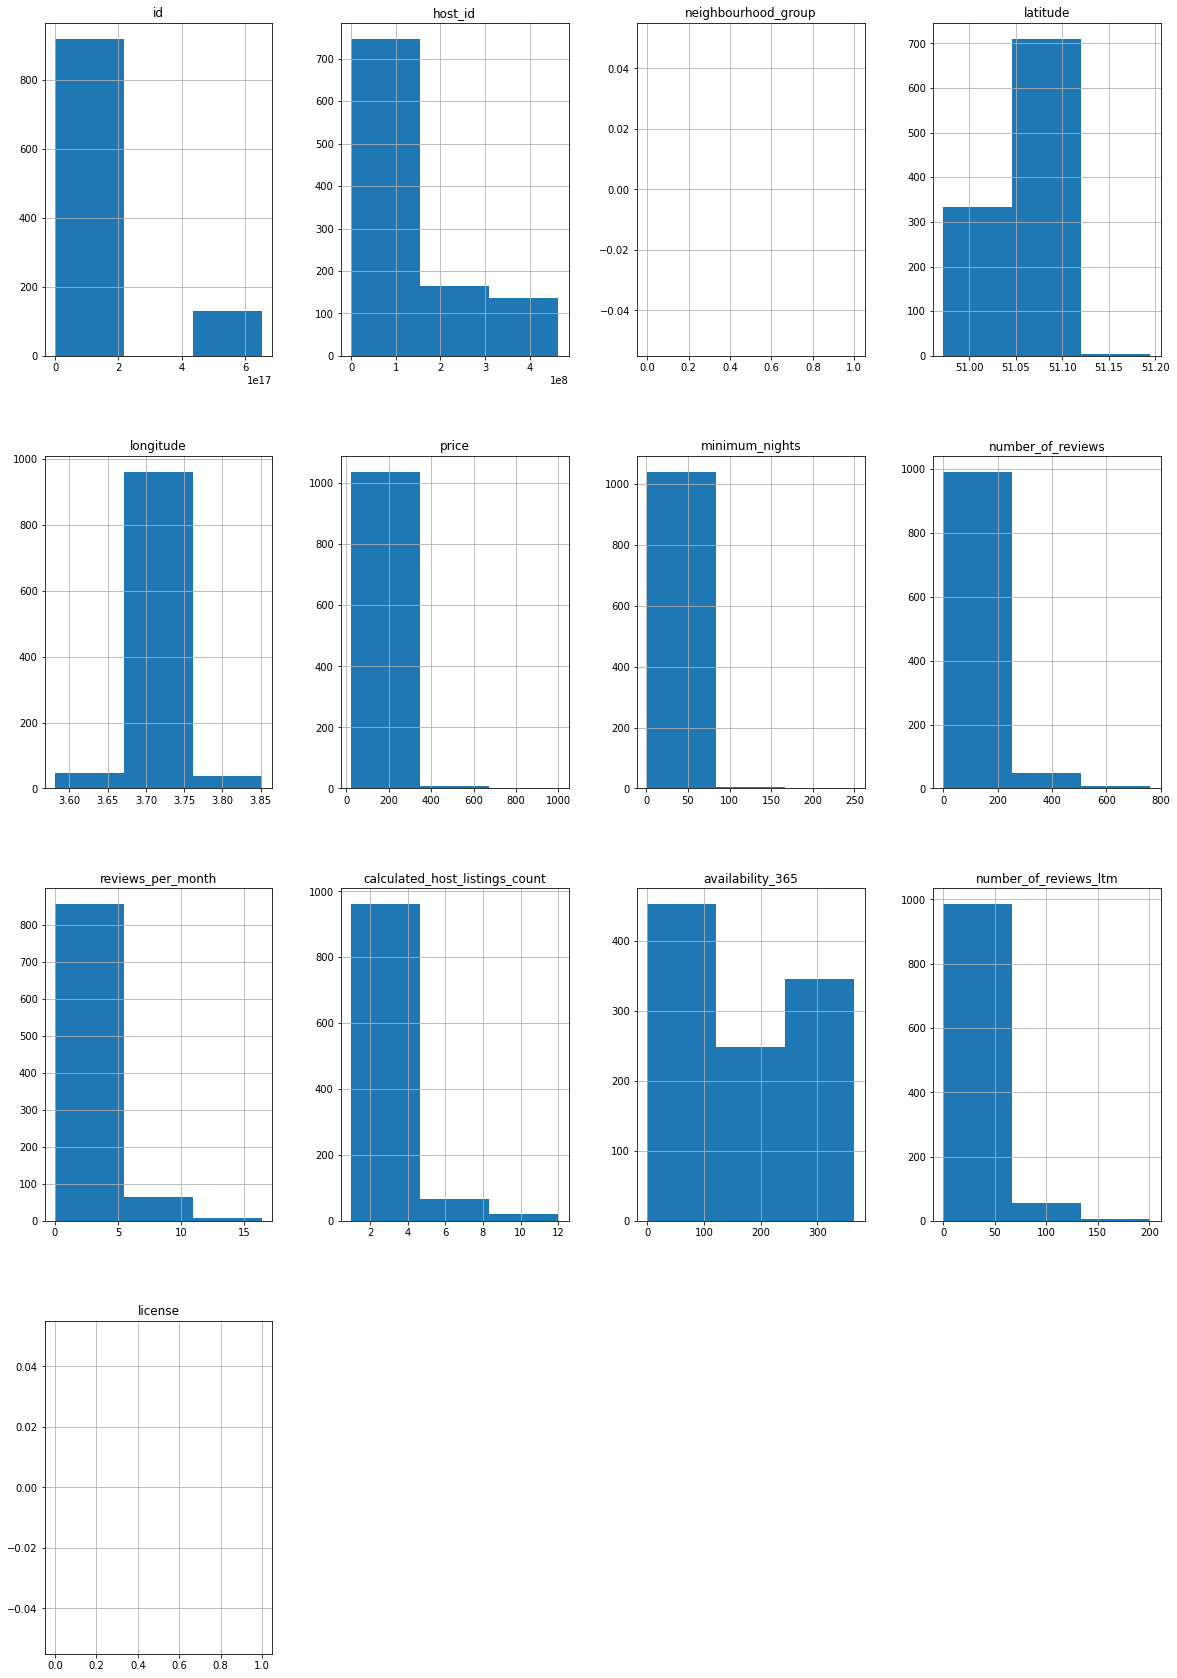

In [65]:
df.hist(bins=3,figsize=(20,30))

3c) Identificando outliers: 

1.   Preço: Um quarto com diária de 1000$ não é algo anormal, mas sobe um pouco a média de preços. 
2.   Mínimo de noites: O valor de 250 está muito fora do padrão e afeta bastante a média.
3.   Existem 91 quartos que não estão disponíveis nenhum dia no ano, valor anormal no contexto do Airbnb.





In [66]:
lista_precos = df.price.sort_values()
lista_noites = df.minimum_nights.sort_values()
lista_disponibilidade = df.availability_365.sort_values()
qtd_dias_disp =(df.availability_365<1).sum()
print(qtd_dias_disp)

91


In [67]:
df[['price','minimum_nights','availability_365']].describe()

,price,minimum_nights,availability_365
count,1048.000000,1048.000000,1048.000000
mean,104.315840,4.092557,163.021947
std,72.201845,11.901940,123.169890
min,22.000000,1.000000,0.000000
25%,64.000000,1.000000,47.750000
50%,87.500000,2.000000,150.000000
75%,125.000000,3.000000,291.000000
max,1000.000000,250.000000,365.000000


3d) Exibindo as variáveis de interesse em BoxPlot usando o parâmetro `kind='box'` dentro da função `plot()`. Além dos parâmetros `vert=False` para formatar horizontalmente e `figsize=(15,3)` para dimensionar o gráfico. A função `plt.show()` chamada do *Matplotlib* mostra o gráfico criado. Nessa visualização ficam bem claros os outliers de cada variável.



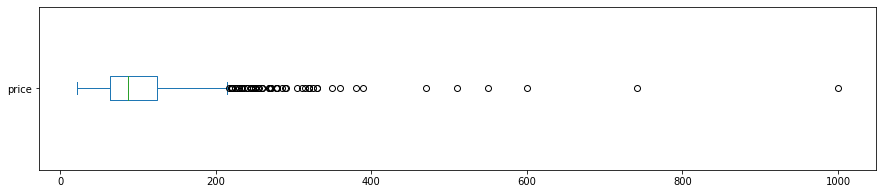

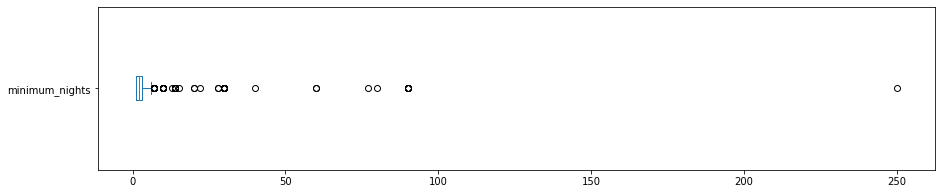

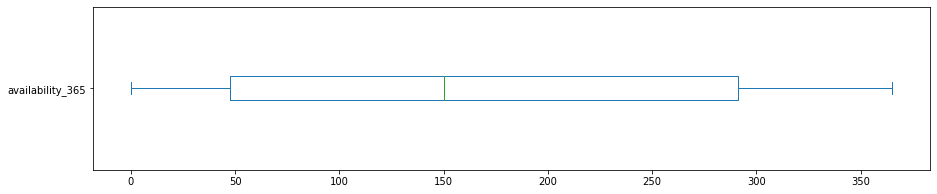

In [68]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
df.availability_365.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

3e) Removendo outliers aparando valores do percentil superior e/ou inferior da variável e recriando o histograma, que agora está numa escala apropriada.

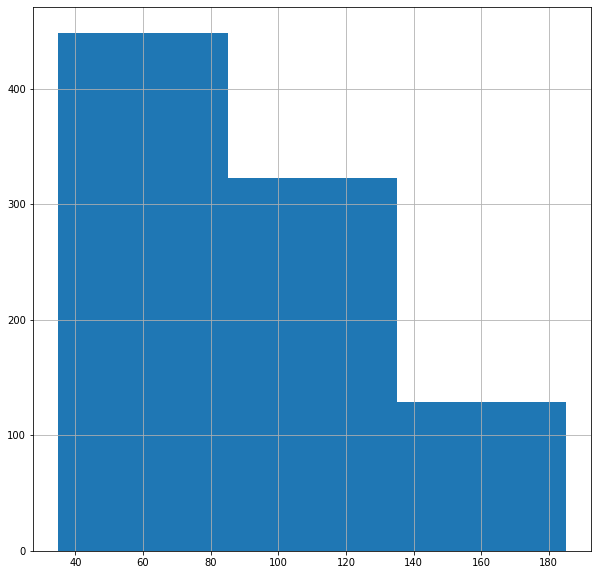

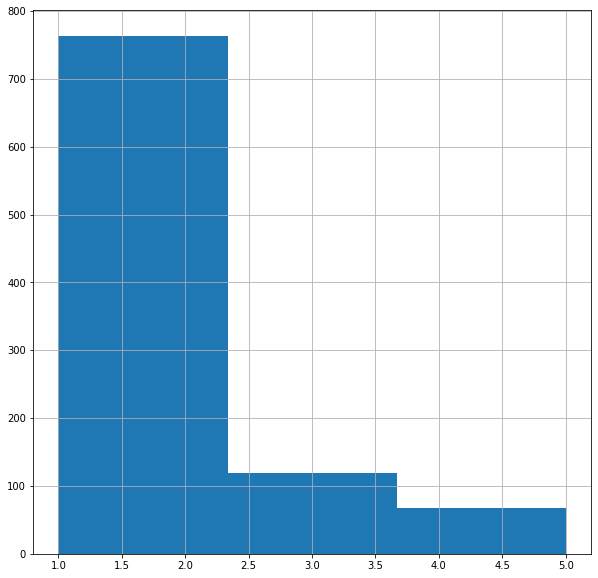

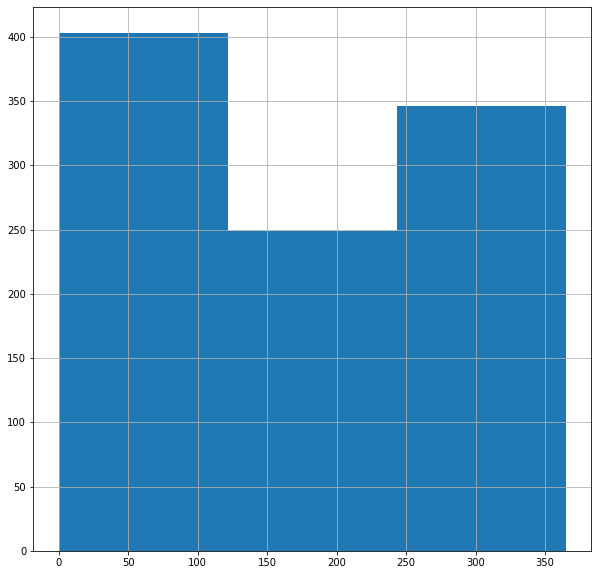

In [69]:
lista_precos = lista_precos[50:950]
lista_noites = lista_noites[:950]
lista_disponibilidade = lista_disponibilidade[50:]

lista_precos.hist(bins=3,figsize=(10,10))
plt.show()
lista_noites.hist(bins=3,figsize=(10,10))
plt.show()
lista_disponibilidade.hist(bins=3,figsize=(10,10))
plt.show()

3f) Utilizando a função `corr()` para estabelecer os índices de correlação entre as variáveis escolhidas, os índices em geral estão muitos próximos de zero, o que indica que não há correlação entre eles, exceto pelo número de avaliações por mês e número total de avaliações, que é diretamente proporcional e têm essa relação porque avaliações por mês é uma métrica derivada do total de avaliações.

In [70]:
correlacao = df[['price','minimum_nights','availability_365', 'number_of_reviews', 'reviews_per_month']].corr()
print(correlacao)

                      price  minimum_nights  availability_365  \
price              1.000000       -0.058566          0.126543   
minimum_nights    -0.058566        1.000000          0.066971   
availability_365   0.126543        0.066971          1.000000   
number_of_reviews -0.065973       -0.073866         -0.002163   
reviews_per_month -0.111839       -0.147998          0.100244   

                   number_of_reviews  reviews_per_month  
price                      -0.065973          -0.111839  
minimum_nights             -0.073866          -0.147998  
availability_365           -0.002163           0.100244  
number_of_reviews           1.000000           0.576331  
reviews_per_month           0.576331           1.000000  


3g) Mostrando o tipo de imóvel mais alugado na região, através da listagem de tipos de imóvel com o respectivo total de avaliações, agrupados por tipo de imóvel com a função `groupby()`. Na região, o tipo de aluguel mais popular é de casas/apartamentos inteiros.

In [71]:
df.groupby('room_type')['number_of_reviews'].sum().sort_values(ascending=False)

room_type
Entire home/apt    44186
Private room       14421
Hotel room           374
Shared room           50
Name: number_of_reviews, dtype: int64

3h) Mostrando o bairro mais caro da região, através da listagem de bairros com suas respectivas médias de preço, agrupando os bairros com a função `groupby()`. O bairro mais caro da região é Moscou - Vogelhoek.

In [72]:
df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Moscou - Vogelhoek                 216.400000
Drongen                            139.444444
Sint Denijs Westrem                137.217391
Rabot  - Blaisantvest              127.714286
Binnenstad                         122.915179
Kanaaldorpen en -zone              121.600000
Sluizeken - Tolhuis - Ham          115.392857
Stationsbuurt Noord                105.927536
Wondelgem                          104.608696
Elisabethbegijnhof - Papegaai      104.559701
Muide - Meulestede - Afrikalaan    100.800000
Stationsbuurt Zuid                 100.500000
Macharius - Heirnis                 96.437500
Bloemekenswijk                      95.727273
Zwijnaarde                          90.840000
Oostakker                           90.750000
Dampoort                            85.097561
Watersportbaan - Ekkergem           84.954545
Mariakerke                          84.545455
Sint Amandsberg                     84.410714
Ledeberg                            83.586957
Brugse Poort - Rooig